# House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.<br>
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
pd.set_option('display.max_columns', None)

## Exploratory Analysis

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
print("The size of the train set is: {}".format(df_train.shape))
print("The size of the test set is: {}".format(df_test.shape))

The size of the train set is: (1460, 81)
The size of the test set is: (1459, 80)


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



 mu = 180921.20 and sigma = 79415.29



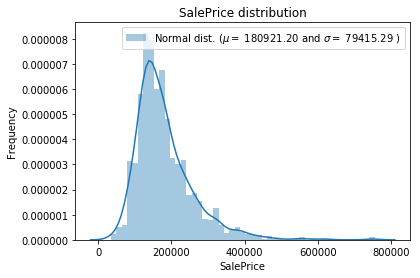

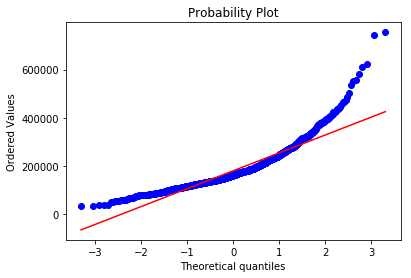

In [5]:
sns.distplot(df_train['SalePrice'])
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



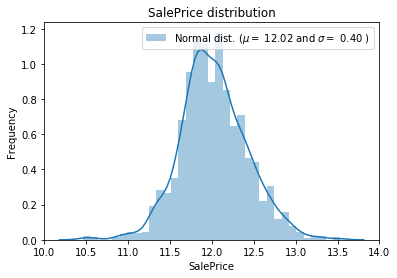

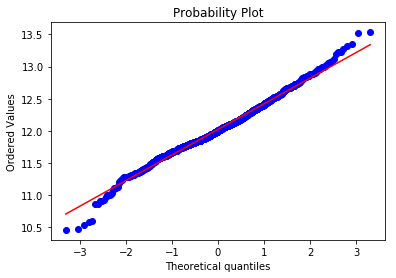

In [6]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

sns.distplot(df_train['SalePrice'])
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Feature Engineering

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    

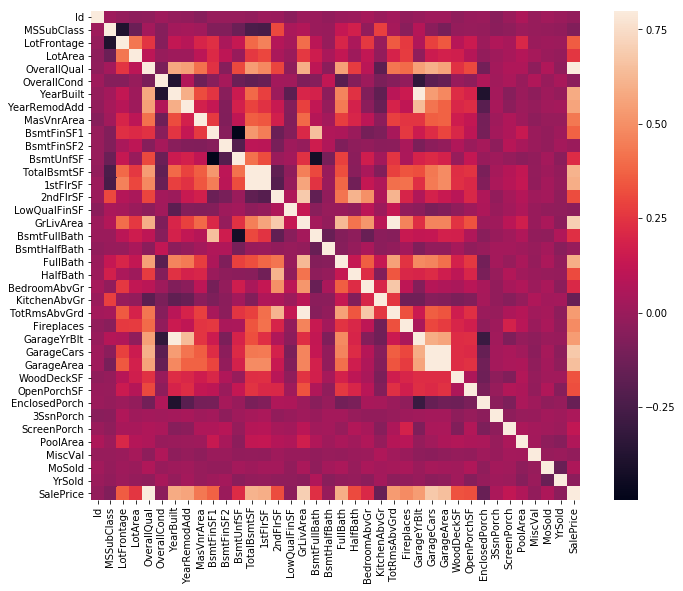

In [7]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

print("Find most important features relative to target")
corrmat.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corrmat.SalePrice)

In [8]:
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.drop(missing_data_train[missing_data_train['Total']==0].index).head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [9]:
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.drop(missing_data_test[missing_data_test['Total']==0].index).head(100)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [10]:
df_train = df_train.drop((missing_data_train[missing_data_train['Total'] > 100]).index, axis = 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_test = df_test.drop((missing_data_test[missing_data_test['Total'] > 100]).index, axis = 1)

In [11]:
#df_test = df_test.drop(df_test.loc[df_test[['Exterior2nd', 'Exterior1st']].isnull().any(1)].index)

In [12]:
print("The size of the train set after droping NA is: {}".format(df_train.shape))
print("The size of the test set after droping NA is: {}".format(df_test.shape))

The size of the train set after droping NA is: (1459, 75)
The size of the test set after droping NA is: (1459, 74)


In [13]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', ):
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

In [14]:
for col in ('GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF',  'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [15]:
df_test['MSZoning']=df_test['MSZoning'].fillna('RL')
df_test["Functional"] =df_test["Functional"].fillna("Typ")
df_test["KitchenQual"] =df_test["KitchenQual"].fillna("TA")
df_test["SaleType"] =df_test["SaleType"].fillna("WD")
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])

Test_id = df_test[['Id']]
df_test.drop(['Id','Utilities'], axis=1, inplace=True)
df_train.drop(['Id','Utilities'], axis=1, inplace=True)

In [16]:
# Check if there are missing values after 
print(df_train.isnull().any().sum())
print(df_test.isnull().any().sum())

0
0


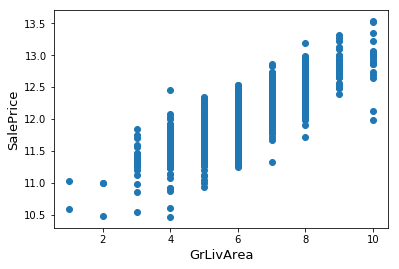

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['OverallQual'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

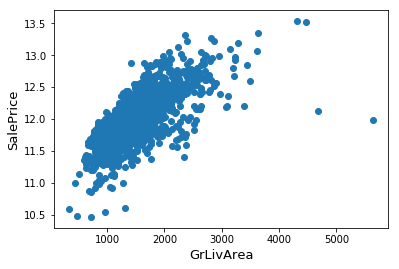

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [19]:
# Remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<12.5)].index)

In [20]:
def toCategorical(columnname):
    for i in columnname:
        df_train[i] = df_train[i].astype(str)
        df_test[i] = df_test[i].astype(str)

In [21]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)

lst = ['OverallCond', 'YrSold', 'MoSold', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

toCategorical(lst)

In [22]:
df_train.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220
5,50,RL,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,11.870607
6,20,RL,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,12.634606
7,60,RL,10382,Pave,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,12.206078
8,50,RM,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,11.774528
9,190,RL,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,11.678448


In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train.dtypes)

MSSubClass        object
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond       object
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64


In [24]:
target = df_train[['SalePrice']]
df_train.drop(['SalePrice'], axis=1, inplace=True)

In [26]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]

skewness = pd.DataFrame({'Skew' :skewed_feats})
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewness.head(10)

There are 18 skewed numerical features to Box Cox transform


,Skew
MiscVal,24.426546
PoolArea,15.927003
LotArea,12.556596
3SsnPorch,10.282886
LowQualFinSF,8.992490
KitchenAbvGr,4.478508
BsmtFinSF2,4.245879
ScreenPorch,4.113045
BsmtHalfBath,4.094248
EnclosedPorch,3.082631


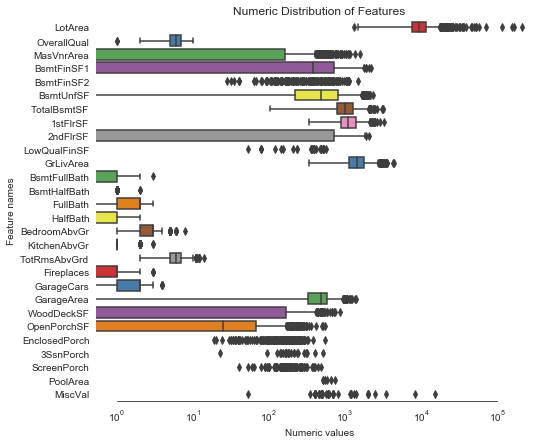

In [27]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_train[numeric_feats] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [28]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)
    df_test[feat] = boxcox1p(df_test[feat], lam)

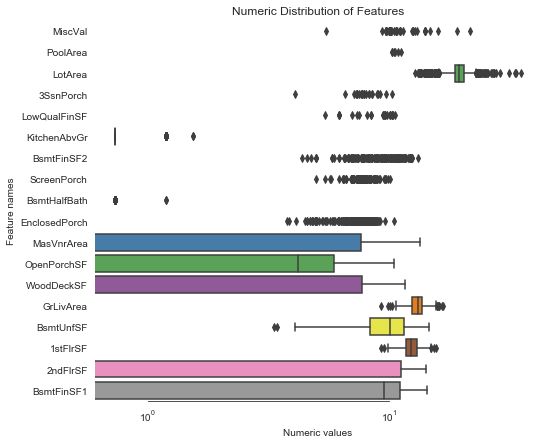

In [29]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_train[skewed_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [30]:
cat_feats = df_train.dtypes[df_train.dtypes == "object"].index

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df_train[cat_feats])    # Assume for simplicity all features are categorical.

# Apply the encoder.
X_train_onehoted = encoder.transform(df_train[cat_feats])
X_test_onehoted = encoder.transform(df_test[cat_feats])

In [31]:
X_train_onehoted = pd.DataFrame(X_train_onehoted.todense())
X_test_onehoted = pd.DataFrame(X_test_onehoted.todense())

In [32]:
df_train_num=df_train.drop(cat_feats, axis=1)
df_test_num=df_test.drop(cat_feats, axis=1)

In [33]:
X_train = pd.concat([df_train_num.reset_index(drop=True), X_train_onehoted.reset_index(drop=True)], axis=1)
X_test = pd.concat([df_test_num.reset_index(drop=True), X_test_onehoted.reset_index(drop=True)], axis=1)

In [34]:
print(X_train.shape)
print(X_test.shape)

(1457, 580)
(1459, 580)


## Modelling

In [43]:
!pip install scikit-learn==0.20.0

  Using cached scikit_learn-0.20.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (7.7 MB)
ERROR: mlxtend 0.17.2 has requirement scikit-learn>=0.20.3, but you'll have scikit-learn 0.20.0 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


In [81]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline

In [102]:
#Validation function
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)

def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train.values, target, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [46]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

In [47]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [48]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=6,
                              learning_rate=0.01, n_estimators=7000,
                              max_bin = 200, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,
                              verbose=-1, random_state=42)

In [49]:
ridge_alphas = [1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

In [87]:
lasso_alphas = [1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5]
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas = lasso_alphas, random_state=42, cv=kf))

In [100]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, model_lgb),
                                meta_regressor=lasso,
                                use_features_in_secondary=True)

In [103]:
scores = {}

In [104]:
score = rmsle_cv(stack_gen)
print("Stacked score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
scores['stack'] = (score.mean(), score.std())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Deprecati

Stacked score: 0.1122 (0.0068)



In [105]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

Gradient Boosting score: 0.1159 (0.0081)



In [106]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

Xgboost score: 0.1190 (0.0052)



In [107]:
score = rmsle_cv(model_lgb)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm score: 0.1188 (0.0072)



In [108]:
score = rmsle_cv(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

Ridge score: 0.1143 (0.0063)



In [109]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

# coef = pd.Series(lasso.coef_, index = X_train.columns)
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso score: 0.1137 (0.0067)



In [79]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [192]:
# stack_gen_model = stack_gen.fit(np.array(X_train), np.array(target))
# gbr_model = GBoost.fit(X_train, target)
# xgb_model = model_xgb.fit(X_train, target)
# lgb_model = model_lgb.fit(X_train, target)
# lasso_model = lasso.fit(X_train, target)
# ridge_model = ridge.fit(X_train, target)

In [111]:
stack_gen.fit(X_train, target)
stack_train_pred = stack_gen.predict(X_train)
stack_pred = np.expm1(stack_gen.predict(X_test))
print(rmsle(target, stack_train_pred))

0.08422441077185254


In [88]:
lasso.fit(X_train, target)
lasso_train_pred = lasso.predict(X_train)
lasso_pred = np.expm1(lasso.predict(X_test))
print(rmsle(target, lasso_train_pred))

0.10402672281264701


In [83]:
GBoost.fit(X_train, target)
GBoost_train_pred = GBoost.predict(X_train)
GBoost_pred = np.expm1(GBoost.predict(X_test))
print(rmsle(target, GBoost_train_pred))

0.08304743994925556


In [84]:
model_xgb.fit(X_train, target)
model_xgb_train_pred = model_xgb.predict(X_train)
model_xgb_pred = np.expm1(model_xgb.predict(X_test))
print(rmsle(target, model_xgb_train_pred))

0.0817129773235739


In [85]:
model_lgb.fit(X_train, target)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = np.expm1(model_lgb.predict(X_test.values))
print(rmsle(target, lgb_train_pred))

0.05051206880149325


In [86]:
ridge.fit(X_train, target)
ridge_train_pred = ridge.predict(X_train)
ridge_pred = np.expm1(ridge.predict(X_test))
print(rmsle(target, ridge_train_pred))

0.08887164374491123


In [98]:
print('RMSLE score on train data:')
print(rmsle(target, lasso_train_pred *0.4 + GBoost_train_pred*0.2 + np.squeeze(ridge_train_pred)*0.2 + model_xgb_train_pred*0.2))

RMSLE score on train data:
0.09553894172284025


In [114]:
sub = pd.DataFrame()
sub['Id'] = Test_id['Id']
sub['SalePrice'] = lasso_pred *0.4 + GBoost_pred*0.2 + np.squeeze(ridge_pred)*0.2 + model_xgb_pred*0.2
sub.to_csv('submission_3.csv',index=False)

In [97]:
sub.shape

(1459, 2)

Finally, the best prediction score of this competition is 0.12364, which is 986th of 4590 (22%). I stacked the Lasso regression, Gradient Boosting, Ridge Regression and XGboost to get the results.<br>
I've read some great notebooks here:<br>
1. [Stacked Regressions to predict House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) by Serigne <br>
2. [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models) by Alexandru Papiu <br>
3. [How I made top 0.3% on a Kaggle competition](https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition) by Lavanya Shukla